<a href="https://colab.research.google.com/github/Nsimaar99/Kaggle-Project/blob/master/Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building the linear regression model

In [19]:
import numpy as np

In [20]:
class Linear_Regression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            y_predicted = self.predict(X)
            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Changed line to correct the dot product
        return np.dot(X, self.weights) + self.bias

Using linear regression model for prediction

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [22]:
# Loading the data from csv file to pandas datafram
salary_data = pd.read_csv('/content/Salary_dataset.csv')

# Printing out the first five rows of the dataset
salary_data.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [23]:
salary_data.shape

(30, 2)

In [24]:
# Checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [25]:
# Splitting the data into feature and target
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

In [26]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
# Training the linear regression model
regressor = Linear_Regression(lr=0.02, n_iters=1000)
regressor.fit(X_train, y_train)


In [28]:
# Load the regression model
regressor = Linear_Regression()
regressor.fit(X_train, y_train)

In [32]:
# Printing the parameter values
print(regressor.weights, regressor.bias)

[10028.86206538] 20177.756599855013


In [33]:
# Predicting the salary value for the test dataset
predicted_salary = regressor.predict(X_test)

In [34]:
print(predicted_salary)

[34218.16349138 32212.39107831 66310.5221006  58287.43244829
 92385.56347058 81353.81519866]


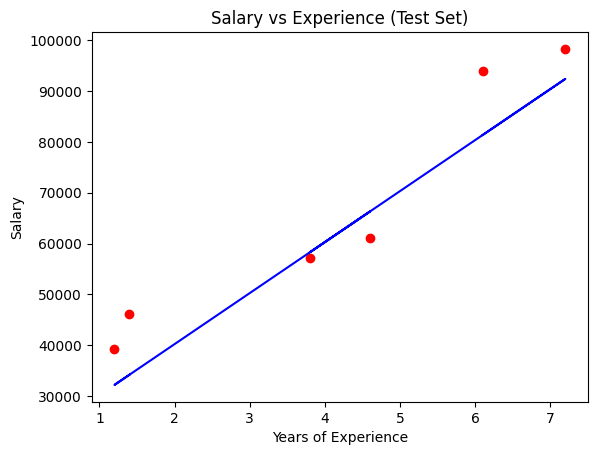

In [36]:
# Visualizing the predicted values and actual values using the test dataset
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, predicted_salary, color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()